# Import module

The link to get [ImageAnalysis3](https://github.com/zhengpuas47/ImageAnalysis3) 

Or from the Zhuang lab archived [source_tools](https://github.com/ZhuangLab/Chromatin_Analysis_2020_cell/tree/master/sequential_tracing/source)

## ImageAnalysis3 and basic modules

In [2]:
%run "C:\Users\shiwei\Documents\ImageAnalysis3\required_files\Startup_py3.py"
sys.path.append(r"C:\Users\shiwei\Documents")

import ImageAnalysis3 as ia
from ImageAnalysis3 import *
from ImageAnalysis3.classes import _allowed_kwds

import h5py
import ast
import pandas as pd

print(os.getpid())

54592


## Chromatin_analysis_tools etc

See **functions** in the repository for [AnalysisTool_Chromatin](../../README.md)

In [3]:
# Chromatin_analysis_tools (ATC)
# Get path for the py containing functions
import os
import sys
import importlib
module_path =r'C:\Users\shiwei\Documents\AnalysisTool_Chromatin'
if module_path not in sys.path:
    sys.path.append(module_path)
    
# import relevant modules
import gene_selection 
importlib.reload(gene_selection)
import gene_to_loci
importlib.reload(gene_to_loci)
import gene_activity
importlib.reload(gene_activity)
import loci_1d_features
importlib.reload(loci_1d_features)  

import atac_to_loci
importlib.reload(atac_to_loci)

<module 'atac_to_loci' from 'C:\\Users\\shiwei\\Documents\\AnalysisTool_Chromatin\\atac_to_loci.py'>

# Define folders

In [4]:
# main folder for postanalysis
postanalysis_folder = r'L:\Shiwei\postanalysis_2024\v0'
# input files for postanalysis
input_folder = os.path.join(postanalysis_folder, 'resources_from_preprocess')

# output file to be generated
output_main_folder = os.path.join(postanalysis_folder, 'chromosome_scaling')

output_analysis_folder = os.path.join(output_main_folder, 'analysis')
output_figure_folder = os.path.join(output_main_folder, 'figures')

# make new folder if needed
make_output_folder = True

if make_output_folder and not os.path.exists(output_analysis_folder):
    os.makedirs(output_analysis_folder)
    print(f'Generating analysis folder: {output_analysis_folder}.')
elif os.path.exists(output_analysis_folder):
    print(f'Use existing analysis folder: {output_analysis_folder}.')
    
if make_output_folder and not os.path.exists(output_figure_folder):
    os.makedirs(output_figure_folder)
    print(f'Generating figure folder: {output_figure_folder}.')
elif os.path.exists(output_figure_folder):
    print(f'Use existing figure folder: {output_figure_folder}.')

Use existing analysis folder: L:\Shiwei\postanalysis_2024\v0\chromosome_scaling\analysis.
Use existing figure folder: L:\Shiwei\postanalysis_2024\v0\chromosome_scaling\figures.


# Plotting parameters

In [5]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')

from ImageAnalysis3.figure_tools import _double_col_width, _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

import seaborn as sns
sns.set_context("paper", rc={"font.size":_font_size,"axes.titlesize":_font_size+1,"axes.labelsize":_font_size})  

In [6]:
# Other required plotting parameters
_dpi = 300
_font_size = 7
_page_width = 5.5


## cell type color-codes

In [7]:
# cell labels from RNA-MERFISH and celltype prediction
selected_cell_labels = ['L2/3 IT','L4/5 IT','L5 IT','L6 IT','L5 ET','L5/6 NP','L6 CT','L6b',
                           'Sst','Pvalb','Lamp5','Sncg','Vip',
                           'Astro','Oligo','OPC','Micro','Endo','VLMC','SMC','Peri', 
                           #'other',
                          ]
# cell palette from RNA-MERFISH UMAP and stats
celltype_palette = {'Astro':'lightcoral', 
                    'Endo':'skyblue', 
                    'L2/3 IT':'gold', 
                    'L4/5 IT':'darkorange', 
                    'L5 ET':'mediumseagreen', 
                    'L5 IT':'aqua',
                    'L5/6 NP':'darkgreen',
                    'L6 CT':'brown',
                    'L6 IT':'magenta',
                    'L6b':'blue', 
                    'Lamp5':'orange', 
                    'Micro':'peachpuff',
                    'OPC':'thistle', 
                    'Oligo':'darkviolet',
                    'Peri':'sandybrown',
                    'Pvalb':'springgreen',
                    'SMC':'rosybrown',
                    'Sncg':'darkkhaki',
                    'Sst':'steelblue', 
                    'VLMC':'saddlebrown', 
                    'Vip':'red',
                    'other':'slategray'}


In [8]:
# this is the plotting order noted based on the snRNA transcriptional acitivty if needed
sorted_cellplot_order_byRNA = ['Micro', 'Oligo', 'Endo', 'OPC', 'Astro', 'Vip', 'Lamp5',
                  'L5/6 NP', 'Sst', 'Sncg', 'Pvalb', 'L4/5 IT', 'L6 CT',
                  'L6 IT', 'L6b', 'L2/3 IT', 'L5 IT', 'L5 ET']

# Load data relevant information

## load and format codebook

[merged codebook](../resources/merged_codebook.csv) as in the repository (merged for all DNA-MERFISH libraries)

In [9]:
# Load codebook 
codebook_fname = os.path.join(input_folder,'merged_codebook.csv')
codebook_df = pd.read_csv (codebook_fname, index_col=0)

# sort df by chr and chr_order
codebook_df = loci_1d_features.sort_loci_df_by_chr_order (codebook_df)
codebook_df.head()

,name,id,NDB_784,NDB_755,NDB_826,NDB_713,NDB_865,NDB_725,NDB_817,NDB_710,...,NDB_479,NDB_562,NDB_608,NDB_460,NDB_563,NDB_592,NDB_368,NDB_436,NDB_629,NDB_604
0,1:3742742-3759944,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1:6245958-6258969,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1:8740008-8759916,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1016,1:9627926-9637875,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017,1:9799472-9811359,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
# Format the chr loci name by 
# 1. changing loci name format
# 2. extract relevant information such as id, chr, chr_order, and library etc
from gene_to_loci import loci_pos_format
loci_name_list = list(map(loci_pos_format, codebook_df['name'].tolist()))
loci_name_arr = np.array(loci_name_list)

# convert to a new dataframe and set loci name as index
codebook_df = codebook_df[['name','id','chr','chr_order','library']]
codebook_df['loci_name'] = list(loci_name_arr[:,0])
codebook_df = codebook_df.set_index ('loci_name')

codebook_df.head()

,name,id,chr,chr_order,library
loci_name,,,,,
chr1_3742742_3759944,1:3742742-3759944,1,1,0.0,CTP11
chr1_6245958_6258969,1:6245958-6258969,2,1,1.0,CTP11
chr1_8740008_8759916,1:8740008-8759916,3,1,2.0,CTP11
chr1_9627926_9637875,1:9627926-9637875,1,1,3.0,CTP13
chr1_9799472_9811359,1:9799472-9811359,2,1,4.0,CTP13


# Load spatial distance from matrices

In [12]:
# Load class_2_median
# class to median distance dict
class_2_median_filename = os.path.join(input_folder, 'subclass_2_medianDict.pkl')

class_2_medianDict = pickle.load(open(class_2_median_filename, 'rb'))
print(class_2_medianDict.keys())

dict_keys(['Oligo', 'L5 IT', 'Micro', 'Peri', 'Endo', 'Astro', 'OPC', 'L6 CT', 'L5 ET', 'L5/6 NP', 'Pvalb', 'L6 IT', 'Lamp5', 'L6b', 'Sst', 'SMC', 'L4/5 IT', 'L2/3 IT', 'Vip', 'Sncg', 'VLMC'])


# Load median summary

Data summary can be generated from the notebook as:

[6_1_cis_distance_summary_across_celltypes](6_1_cis_distance_summary_across_celltypes.ipynb)

In [13]:
import tqdm
dist_summary_folder = os.path.join(r'L:\Shiwei\postanalysis_2024\v0\chromosome_scaling\analysis',
                                     'Cis_dismap_summary')

distmap_summary_df_list = []
for _class in tqdm.tqdm(class_2_medianDict.keys()):
    _class_distmap_summary_df = pd.read_csv(os.path.join(dist_summary_folder,
                                                  f'raw_cis_distmap_subclass_{_class.replace("/","_").replace(" ","_")}_summary.csv'),
                                           index_col=0)
    distmap_summary_df_list.append(_class_distmap_summary_df)
    
distmap_summary_df = pd.concat(distmap_summary_df_list)
distmap_summary_df

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:03<00:00,  5.48it/s]


,loc_1,loc_2,pairwise_distance,subclass,chr,genomic_distance
loci_pairs,,,,,,
0,chr1_3742742_3759944,chr1_3742742_3759944,0.000000,Oligo,1,0
1,chr1_3742742_3759944,chr1_6245958_6258969,0.922651,Oligo,1,2503216
2,chr1_3742742_3759944,chr1_8740008_8759916,1.070654,Oligo,1,4997266
3,chr1_3742742_3759944,chr1_9627926_9637875,1.060591,Oligo,1,5885184
4,chr1_3742742_3759944,chr1_9799472_9811359,1.093519,Oligo,1,6056730
...,...,...,...,...,...,...
2223475,chrX_167157164_167167452,chrX_169963295_170005197,0.845943,VLMC,X,2806131
2223476,chrX_168746045_168757590,chrX_168746045_168757590,0.000000,VLMC,X,0
2223477,chrX_168746045_168757590,chrX_169963295_170005197,0.706862,VLMC,X,1217250


# Compare celltype pairs

In [14]:
from sklearn.linear_model import LinearRegression

## all chromosomes

meta NOT subset; don't know how to subset; dropped


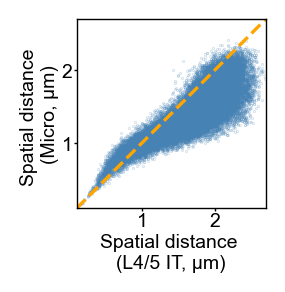

In [21]:
%matplotlib inline
import tqdm

sel_sorted_bin_keys = [(0., np.inf),(10000000, np.inf),(0, 2000000)]
#color_list = ['gray','steelblue','orange',]
color_list = ['steelblue','steelblue','orange',]



ref_cls = 'L4/5 IT'

for sel_cls_2 in ['Micro']:
    fig, ax = plt.subplots(figsize=(1.1,1.1),dpi=200)
    
    # if plot separately by different genomic distance
    for _idx,_bin_key in enumerate(sel_sorted_bin_keys):
        short_gd_th = _bin_key[0]
        long_gd_th = _bin_key[1]
        sel_distmap_summary_df = distmap_summary_df[(distmap_summary_df['genomic_distance']<long_gd_th)&
                                            (distmap_summary_df['genomic_distance']>short_gd_th)]

        X = np.array(sel_distmap_summary_df[sel_distmap_summary_df['subclass']==ref_cls]['pairwise_distance'].tolist())
        y = np.array(sel_distmap_summary_df[sel_distmap_summary_df['subclass']==sel_cls_2]['pairwise_distance'].tolist())
        # plot accordingly
        if _idx==0:
            valid_inds = (np.isfinite(X) & np.isfinite(y))
            X = X[valid_inds,np.newaxis]
            y = y[valid_inds]
            ax.scatter(X,y,s=.01,alpha=0.7,color=color_list[_idx],label=f'All chr',rasterized=True)


    ax.grid(False)
    ax.set_aspect('equal')
    plt.xlim([0.1,2.7])
    plt.ylim([0.1,2.7])
    diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="orange")
    plt.tick_params(axis='y', rotation=0, pad =0.5, labelsize=_font_size) 
    ax.set_xlabel(f'{ref_cls}',fontsize=_font_size,labelpad=1)
    ax.tick_params(axis='x', rotation=0, pad =0.5, labelsize=_font_size) 
    ax.set_ylabel(f'{sel_cls_2}', fontsize=_font_size, labelpad=1)


    ax.set_xlabel(f'Spatial distance \n({ref_cls}, \u03BCm)',fontsize=_font_size,labelpad=1)
    ax.tick_params(axis='x', rotation=0, pad =0.5, length=1, width=0.5, labelsize=7) 
    ax.set_ylabel(f'Spatial distance \n({sel_cls_2}, \u03BCm)', fontsize=_font_size, labelpad=1)
    ax.tick_params(axis='y', rotation=0, pad =0.5, length=1, width=0.5, labelsize=7) 

    [i[1].set_linewidth(0.5) for i in ax.spines.items()]



    fig.subplots_adjust(wspace=0.0, hspace=0.0, left=0.05, right=0.95, top=0.98, bottom=0.12)
    ref_cls=ref_cls.replace('/','_').replace(' ','_')
    sel_cls_2=sel_cls_2.replace('/','_').replace(' ','_')
    plt.savefig(os.path.join(output_figure_folder, f'cis_dist_scatter_all_chroms_{ref_cls}_{sel_cls_2}.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight')

    plt.show()

## selected chromosome only

meta NOT subset; don't know how to subset; dropped


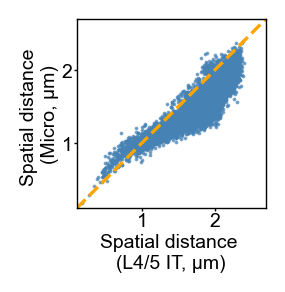

In [30]:
%matplotlib inline
import tqdm

sel_sorted_bin_keys = [(0., np.inf),(10000000, np.inf),(0, 2000000)]
#color_list = ['gray','steelblue','orange',]
color_list = ['steelblue','steelblue','orange',]


chosen_chrom = '1'


ref_cls = 'L4/5 IT'

for sel_cls_2 in ['Micro']:
    fig, ax = plt.subplots(figsize=(1.1,1.1),dpi=200)
    
    # if plot separately by different genomic distance
    for _idx,_bin_key in enumerate(sel_sorted_bin_keys):
        short_gd_th = _bin_key[0]
        long_gd_th = _bin_key[1]
        sel_distmap_summary_df = distmap_summary_df[(distmap_summary_df['genomic_distance']<long_gd_th)&
                                            (distmap_summary_df['genomic_distance']>short_gd_th)]
        
        sel_distmap_summary_df=sel_distmap_summary_df[sel_distmap_summary_df['chr']==chosen_chrom]

        X = np.array(sel_distmap_summary_df[sel_distmap_summary_df['subclass']==ref_cls]['pairwise_distance'].tolist())
        y = np.array(sel_distmap_summary_df[sel_distmap_summary_df['subclass']==sel_cls_2]['pairwise_distance'].tolist())
        # plot accordingly
        if _idx==0:
            valid_inds = (np.isfinite(X) & np.isfinite(y))
            X = X[valid_inds,np.newaxis]
            y = y[valid_inds]
            ax.scatter(X,y,s=.3,alpha=0.7,color=color_list[_idx],label=f'Chr{chosen_chrom}',rasterized=True)


    ax.grid(False)
    ax.set_aspect('equal')
    plt.xlim([0.1,2.7])
    plt.ylim([0.1,2.7])
    diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="orange")
    plt.tick_params(axis='y', rotation=0, pad =0.5, labelsize=_font_size) 
    ax.set_xlabel(f'{ref_cls}',fontsize=_font_size,labelpad=1)
    ax.tick_params(axis='x', rotation=0, pad =0.5, labelsize=_font_size) 
    ax.set_ylabel(f'{sel_cls_2}', fontsize=_font_size, labelpad=1)


    ax.set_xlabel(f'Spatial distance \n({ref_cls}, \u03BCm)',fontsize=_font_size,labelpad=1)
    ax.tick_params(axis='x', rotation=0, pad =0.5, length=1, width=0.5, labelsize=7) 
    ax.set_ylabel(f'Spatial distance \n({sel_cls_2}, \u03BCm)', fontsize=_font_size, labelpad=1)
    ax.tick_params(axis='y', rotation=0, pad =0.5, length=1, width=0.5, labelsize=7) 

    [i[1].set_linewidth(0.5) for i in ax.spines.items()]



    fig.subplots_adjust(wspace=0.0, hspace=0.0, left=0.05, right=0.95, top=0.98, bottom=0.12)
    ref_cls=ref_cls.replace('/','_').replace(' ','_')
    sel_cls_2=sel_cls_2.replace('/','_').replace(' ','_')
    plt.savefig(os.path.join(output_figure_folder, f'cis_dist_scatter_chr{chosen_chrom}_{ref_cls}_{sel_cls_2}.pdf'), 
            transparent=True, dpi=300, bbox_inches='tight')

    plt.show()

# Compared merged neurons vs. non-neuronal cells

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
neu_id_dict = {'Neuron':['L2/3 IT', 'L4/5 IT', 'L5 ET', 'L5 IT', 
                      'L5/6 NP','L6 CT', 'L6 IT', 'L6b', 'Pvalb','Sst',]
               , 'NonNeu.':['Astro', 'Endo', 'Micro', 'OPC', 'Oligo', 'Peri', ]}

## all chromosomes

meta NOT subset; don't know how to subset; dropped


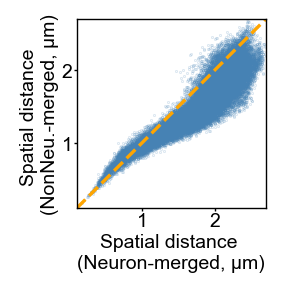

In [26]:
%matplotlib inline
import tqdm

sel_sorted_bin_keys = [(0., np.inf),(2000000, np.inf),(0, 10000000)]
#color_list = ['gray','steelblue','orange',]
color_list = ['steelblue','steelblue','orange',]



ref_cls = 'Neuron'
sel_cls_2 = 'NonNeu.'


fig, ax = plt.subplots(figsize=(1.1,1.1),dpi=200)

# if plot separately by different genomic distance
for _idx,_bin_key in enumerate(sel_sorted_bin_keys):

    short_gd_th = _bin_key[0]
    long_gd_th = _bin_key[1]
    sel_distmap_summary_df = distmap_summary_df[(distmap_summary_df['genomic_distance']<long_gd_th)&
                                        (distmap_summary_df['genomic_distance']>short_gd_th)]
    
    X_list = []
    y_list = []
    for _c in neu_id_dict[ref_cls]:
        _X = np.array(sel_distmap_summary_df[sel_distmap_summary_df['subclass']==_c]['pairwise_distance'].tolist())
        X_list.append(_X)
    for _c in neu_id_dict[sel_cls_2]:
        _y = np.array(sel_distmap_summary_df[sel_distmap_summary_df['subclass']==_c]['pairwise_distance'].tolist())
        y_list.append(_y)
        
    X = np.nanmedian(np.array(X_list), axis=0)
    y = np.nanmedian(np.array(y_list), axis=0)
    
    
    valid_inds = (np.isfinite(X) & np.isfinite(y))
    X = X[valid_inds]
    y = y[valid_inds]
        

    # calculate correlation for all loci
    if _idx==0:
        #pearson_r, _ = pearsonr(X, y)
        ax.scatter(X,y,s=.01,alpha=0.6,color=color_list[_idx],label=f'Genomic locus',rasterized=True)



#ax.set_title (f'All chromosomes \n r={round(pearson_r,2)}', fontsize=7)

ax.grid(False)
ax.set_aspect('equal')
plt.xlim([0.1,2.7])
plt.ylim([0.1,2.7])
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="orange")
plt.tick_params(axis='y', rotation=0, pad =0.5, labelsize=_font_size) 
# set xylabel
ax.set_xlabel(f'Spatial distance \n({ref_cls}-merged, \u03BCm)',fontsize=_font_size,labelpad=1)
ax.tick_params(axis='x', rotation=0, pad =0.5, length=1, width=0.5, labelsize=7) 
ax.set_ylabel(f'Spatial distance \n({sel_cls_2}-merged, \u03BCm)', fontsize=_font_size, labelpad=1)
ax.tick_params(axis='y', rotation=0, pad =0.5, length=1, width=0.5, labelsize=7) 
[i[1].set_linewidth(0.5) for i in ax.spines.items()]

fig.subplots_adjust(wspace=0.0, hspace=0.0, left=0.05, right=0.95, top=0.98, bottom=0.12)
ref_cls=ref_cls.replace('/','_').replace(' ','_')
sel_cls_2=sel_cls_2.replace('/','_').replace(' ','_')
plt.savefig(os.path.join(output_figure_folder, f'cis_dist_scatter_all_chroms_{ref_cls}_{sel_cls_2}.pdf'), 
        transparent=True, dpi=300, bbox_inches='tight')

plt.show()

## selected chromosome only

meta NOT subset; don't know how to subset; dropped


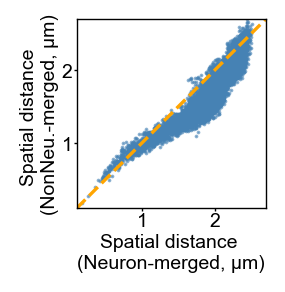

In [29]:
%matplotlib inline
import tqdm

sel_sorted_bin_keys = [(0., np.inf),(2000000, np.inf),(0, 10000000)]
#color_list = ['gray','steelblue','orange',]
color_list = ['steelblue','steelblue','orange',]

chosen_chrom = '1'

ref_cls = 'Neuron'
sel_cls_2 = 'NonNeu.'


fig, ax = plt.subplots(figsize=(1.1,1.1),dpi=200)

# if plot separately by different genomic distance
for _idx,_bin_key in enumerate(sel_sorted_bin_keys):

    short_gd_th = _bin_key[0]
    long_gd_th = _bin_key[1]
    sel_distmap_summary_df = distmap_summary_df[(distmap_summary_df['genomic_distance']<long_gd_th)&
                                        (distmap_summary_df['genomic_distance']>short_gd_th)]
    
    sel_distmap_summary_df=sel_distmap_summary_df[sel_distmap_summary_df['chr']==chosen_chrom]
    
    X_list = []
    y_list = []
    for _c in neu_id_dict[ref_cls]:
        _X = np.array(sel_distmap_summary_df[sel_distmap_summary_df['subclass']==_c]['pairwise_distance'].tolist())
        X_list.append(_X)
    for _c in neu_id_dict[sel_cls_2]:
        _y = np.array(sel_distmap_summary_df[sel_distmap_summary_df['subclass']==_c]['pairwise_distance'].tolist())
        y_list.append(_y)
        
    X = np.nanmedian(np.array(X_list), axis=0)
    y = np.nanmedian(np.array(y_list), axis=0)
    
    
    valid_inds = (np.isfinite(X) & np.isfinite(y))
    X = X[valid_inds]
    y = y[valid_inds]
        

    # calculate correlation for all loci
    if _idx==0:
        #pearson_r, _ = pearsonr(X, y)
        ax.scatter(X,y,s=.3,alpha=0.6,color=color_list[_idx],label=f'Genomic locus',rasterized=True)



#ax.set_title (f'All chromosomes \n r={round(pearson_r,2)}', fontsize=7)

ax.grid(False)
ax.set_aspect('equal')
plt.xlim([0.1,2.7])
plt.ylim([0.1,2.7])
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c="orange")
plt.tick_params(axis='y', rotation=0, pad =0.5, labelsize=_font_size) 
# set xylabel
ax.set_xlabel(f'Spatial distance \n({ref_cls}-merged, \u03BCm)',fontsize=_font_size,labelpad=1)
ax.tick_params(axis='x', rotation=0, pad =0.5, length=1, width=0.5, labelsize=7) 
ax.set_ylabel(f'Spatial distance \n({sel_cls_2}-merged, \u03BCm)', fontsize=_font_size, labelpad=1)
ax.tick_params(axis='y', rotation=0, pad =0.5, length=1, width=0.5, labelsize=7) 
[i[1].set_linewidth(0.5) for i in ax.spines.items()]

fig.subplots_adjust(wspace=0.0, hspace=0.0, left=0.05, right=0.95, top=0.98, bottom=0.12)
ref_cls=ref_cls.replace('/','_').replace(' ','_')
sel_cls_2=sel_cls_2.replace('/','_').replace(' ','_')
plt.savefig(os.path.join(output_figure_folder, f'cis_dist_scatter_chr{chosen_chrom}_{ref_cls}_{sel_cls_2}.pdf'), 
        transparent=True, dpi=300, bbox_inches='tight')

plt.show()